### **Shows how to use the trained GMNet for surface water mapping.**


In [7]:
from utils.imgShow import imgShow
from utils.geotif_io import readTiff
import matplotlib.pyplot as plt
import numpy as np
from scripts.gmnet_infer import gmnet_infer


### The s1_as and s1_des images can be layer stacked to s1_stacked.tif by using utils/lay_stack.py


In [8]:
# from utils.lay_stack import lay_stack
# lay_stack(path_imgs=['data/test_demo/s1as.tif', 'data/test_demo/s1des.tif'], path_out='data/test_demo/s1_stacked.tif')


Images layer stacking done.


In [9]:
path_s1as = 'data/test_demo/s1as.tif'
path_s1des = 'data/test_demo/s1des.tif'
path_s1_stacked = 'data/test_demo/s1_stacked.tif'
s1_as, s1_as_info = readTiff(path_s1as)
s1_des, s1_des_info = readTiff(path_s1des)
s1_stacked, s1_stacked_info = readTiff(path_s1_stacked)


Text(0.5, 1.0, 'S1 stacked image')

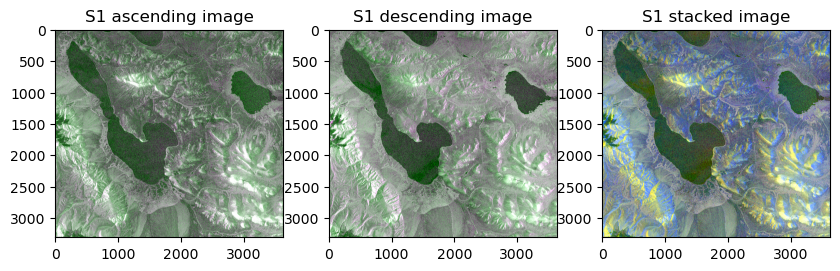

In [10]:
plt.figure(figsize=(10, 3))
plt.subplot(1,3,1)
imgShow(s1_as, clip_percent=1, per_band_clip=True, color_bands=(0,1,0))
plt.title('S1 ascending image')
plt.subplot(1,3,2)
imgShow(s1_des, clip_percent=1, per_band_clip=True, color_bands=(0,1,0))
plt.title('S1 descending image')
plt.subplot(1,3,3)
imgShow(s1_stacked, clip_percent=1, per_band_clip=True, color_bands=(0,1,2))
plt.title('S1 stacked image')


In [11]:
path_model_as_w = 'model/trained_model/scales/unet_scales_gate/dset/as/model_1_weights.pth'
path_model_des_w = 'model/trained_model/scales/unet_scales_gate/dset/des/model_1_weights.pth'
path_model_w = 'model/trained_model/scales/unet_scales_gate/dset/as_des/model_1_weights.pth'

wat_pred_as = gmnet_infer(s1_as, path_model_as_w, orbit='as')   ### for s1 ascending image only
wat_pred_des = gmnet_infer(s1_des, path_model_des_w, orbit='des')   ### for s1 descending image only
wat_pred = gmnet_infer(s1_stacked, path_model_w, orbit='as_des')    ### for stacked s1 ascending and descending images 


...pretrained models have been loaded
...Input image have been normalized
--- Convert input image to patch list...
Number of multi-scale patches: 342
...Input image have been converted to patches list
--- surface water mapping using the pretrained gmnet model...
...pretrained models have been loaded
...Input image have been normalized
--- Convert input image to patch list...
Number of multi-scale patches: 342
...Input image have been converted to patches list
--- surface water mapping using the pretrained gmnet model...
...pretrained models have been loaded
...Input image have been normalized
--- Convert input image to patch list...
Number of multi-scale patches: 342
...Input image have been converted to patches list
--- surface water mapping using the pretrained gmnet model...


### Visualize the prediction surface water. 
#### The results show that the stacked ascending and desending images achieved the best surface water result.  
#### **Note: in the pratical application, the edge of the prediction surafce water map should be removed to guarantee the high prediction precision.**



Text(0.5, 1.0, 'S1 stacked images')

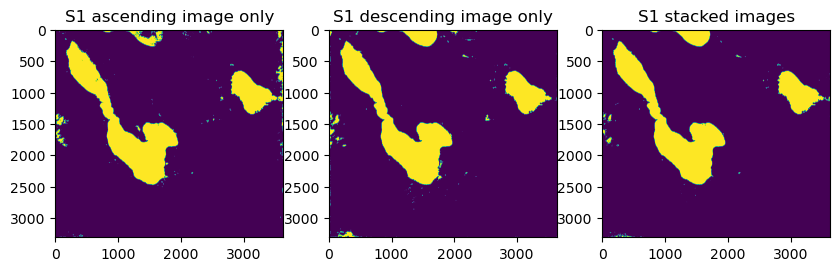

In [12]:
plt.figure(figsize=(10, 3))
plt.subplot(1,3,1)
plt.imshow(wat_pred_as)
plt.title('S1 ascending image only')
plt.subplot(1,3,2)
plt.imshow(wat_pred_des)
plt.title('S1 descending image only')
plt.subplot(1,3,3)
plt.imshow(wat_pred)
plt.title('S1 stacked images')
